# Simple Walk 2D continuous

base environment on https://github.com/nicknochnack/ReinforcementLearningCourse/blob/main/Project%203%20-%20Custom%20Environment.ipynb

continuous state space environment

action space: BOX in two directions from -1 to 1

state space: box with shape(2,1)?

goal reached when distance closer than 1





## 1. Import Dependencies

In [81]:
import gym 
from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 
import numpy as np
import random
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

import matplotlib.pyplot as plt

# logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)


In [82]:
test_box = Box(low=0.0, high=10.0, shape=(2,2))
print(test_box)
print(type(test_box))
print(test_box.sample())
print(type(test_box.sample()))
print(test_box.sample().shape)

Box([[0. 0.]
 [0. 0.]], [[10. 10.]
 [10. 10.]], (2, 2), float32)
<class 'gym.spaces.box.Box'>
[[4.9309607  0.88071537]
 [3.1604478  0.637375  ]]
<class 'numpy.ndarray'>
(2, 2)


In [83]:
state = np.ndarray(shape=(2,2), dtype=np.float32)
print(state)
print(type(state))
state = np.random.uniform(0.0, 10.0, 2)
print(state)
print(type(state))

[[4.3416243 5.9690957]
 [5.3159432 3.3880877]]
<class 'numpy.ndarray'>
[8.13282961 9.29701575]
<class 'numpy.ndarray'>


In [84]:
state = np.random.uniform(0.0, 10.0, (2,2))
print(state)
print(state[0])
distance = np.linalg.norm(state[0] - state[1])
print(distance)

[[1.12106641 6.50546561]
 [2.04869718 0.6325424 ]]
[1.12106641 6.50546561]
5.945731733476572


In [85]:
def out_of_bounds(state):
    return not (0.0 <= state[0] <= 10.0 and 0.0 <= state[1] <= 10.0)

position = np.random.uniform(-10.0, 10.0, (2,))
print(position)
print(out_of_bounds(position))


[-1.09710457  4.54145935]
True


In [86]:
# safe array test
random_numpy1 = np.random.uniform(0.0, 10.0, (2,))
random_numpy2 = np.random.uniform(0.0, 10.0, (2,))
state_array = []
print(state_array)
state_array.append(random_numpy1.tolist())
print(state_array)
state_array.append(random_numpy2.tolist())
print(state_array)


[]
[[3.252626211873727, 2.6723754339261507]]
[[3.252626211873727, 2.6723754339261507], [6.82255924418019, 9.750374988964612]]


In [87]:
class SimpleWalk2Dcont(Env):
    """simple walk environment in 2D with a continuous action and state space"""
    def __init__(self):
        self.x_min = 0.0
        self.x_max = 10.0
        self.max_steps = 15
        self.action_space = Box(low=-1.0, high=1.0, shape=(2, ))
        self.observation_space = Box(low=self.x_min, high=self.x_max, shape=(2, 2)) # 0 position, 1 goal
        self.state = np.ndarray(shape=(2,2), dtype=np.float32)
        # safe past states in an array, safe x and y positions
        
        
        
    
    def step(self, action):
        # update position
        self.state[0] += action
        self.__append_state()
        self.steps_taken += 1
        distance_to_goal = np.linalg.norm(state[0] - state[1])
    
        if self.steps_taken >= self.max_steps:
            # maximum number of steps reached
            reward = -10.0
            done = True
        elif self.__out_of_bounds():
            # went out of bounds
            reward = -10.0
            done = True
        elif distance_to_goal < 1:
            # reached goal
            reward = 10.0
            logging.debug("reached goal")
            done = True
        elif self.distance_to_goal > distance_to_goal:
            # got closer
            reward = 0.1
            done = False
        else:
            # stepped away
            reward = -0.1
            done = False
        
        # update distance to goal
        self.distance_to_goal = distance_to_goal
        
        return self.state, reward, done, {}
    
    def reset(self):
        self.state = np.random.uniform(self.x_min, self.x_max, (2,2))
        self.state_array = [[], []] # x, y
        self.__append_state()
        self.steps_taken = 0
        self.distance_to_goal = self.x_max - self.x_min
        return self.state
    
    def render(self):
        print("visited states: ", self.state_array)
        goal = self.state[1]
        print(goal)
        print("goal: " + np.array2string(self.state[1]))
        
        
        # plot
        fig, ax = plt.subplots()

        ax.plot(self.state_array[0], self.state_array[1], linewidth=2.0)
        ax.plot(self.state[1][0], self.state[1][1], 'ro')
        ax.set(
            xlim=(self.x_min, self.x_max), #xticks=np.arange(1, 8),
            ylim=(self.x_min, self.x_max), #yticks=np.arange(1, 8))
            )
        circle1 = plt.Circle((self.state[1][0], self.state[1][1]), 1, color='r', fill=False)
        ax.add_patch(circle1)

        plt.show()
        
    
    def __out_of_bounds(self):
        """check if the current state is out of bounds"""
        position = self.state[0]
        for element in position:
            if not (self.x_min <= element <= self.x_max):
                logging.debug("out of bounds")
                return True
            else:
                return False
            
    def __append_state(self):
        self.state_array[0].append(self.state[0][0])
        self.state_array[1].append(self.state[0][1])
    
env = SimpleWalk2Dcont()

print(env.action_space.sample())
print(env.observation_space.sample())

[ 0.43230256 -0.03417097]
[[2.7611208 8.555006 ]
 [8.749513  9.952988 ]]


In [88]:
print('Test: ', env.state[1])

Test:  [10. 10.]


## Check Environment

DEBUG:root:out of bounds
INFO:root:Episode:1 Score:-10.1


visited states:  [[6.8564150086552145, 6.398850833526278, 6.372557404911542, 6.489458951628232, 7.451724204695249, 7.817089799320722, 8.163064661896254, 7.715561303770567, 8.34181723324063, 8.566206607496763, 9.009627673304106, 9.096023369109655, 8.83648784784081, 9.478414315259482, 10.182640987908865], [3.4120380715306933, 3.136914624350899, 2.396489752906197, 2.0298402444299395, 3.016708506720894, 3.237223057525986, 2.238837330120438, 1.2452134177859957, 0.7728531048473055, 1.6261713192638094, 2.5405935928996737, 3.303152470367783, 2.893372891920441, 3.0526991323407824, 2.2035636142667467]]
[6.689309   8.13862219]
goal: [6.689309   8.13862219]


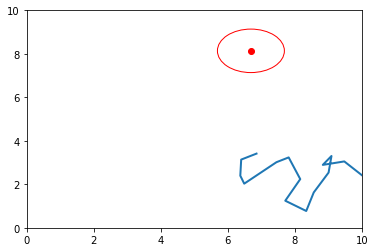

In [89]:
env = SimpleWalk2Dcont()
episodes = 1
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        # env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    logging.info('Episode:{} Score:{}'.format(episode, score))
    env.render()
env.close()

In [90]:
from stable_baselines3.common import env_checker
env_checker.check_env(env)

## Callback

In [91]:
# create callback fun

import os
from stable_baselines3.common.callbacks import BaseCallback

class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok = True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
            
        return True

env_name = 'Walk2Dcont'

CHECKPOINT_DIR = './train/train_' + env_name
LOG_DIR = './train/log_' + env_name

callback = TrainAndLoggingCallback(check_freq=10_000, save_path=CHECKPOINT_DIR)

## Train

In [92]:
log_path = os.path.join('Training', 'Logs')

In [93]:
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [94]:
model.learn(
    total_timesteps=40_000, 
    callback = callback
    )

Logging to Training\Logs\PPO_13


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.5     |
|    ep_rew_mean     | -10.9    |
| time/              |          |
|    fps             | 280      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 12.2        |
|    ep_rew_mean          | -10.9       |
| time/                   |             |
|    fps                  | 317         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010509497 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.82       |
|    explained_variance   | 0.0083      |
|    learning_rate        | 0.0003      |
|    loss                 | 1.2         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0171     |
|    std                  | 0.99        |
|    value_loss           | 11.1        |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 13.6        |
|    ep_rew_mean          | -11.1       |
| time/                   |             |
|    fps                  | 329         |
|    iterations           | 3           |
|    time_elapsed         | 18          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.010188578 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.8        |
|    explained_variance   | -0.0548     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.07        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0138     |
|    std                  | 0.975       |
|    value_loss           | 0.441       |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.1        |
|    ep_rew_mean          | -11.1       |
| time/                   |             |
|    fps                  | 338         |
|    iterations           | 4           |
|    time_elapsed         | 24          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.007888971 |
|    clip_fraction        | 0.0877      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.77       |
|    explained_variance   | -0.552      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0145      |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00917    |
|    std                  | 0.963       |
|    value_loss           | 0.0316      |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.5        |
|    ep_rew_mean          | -11.2       |
| time/                   |             |
|    fps                  | 340         |
|    iterations           | 5           |
|    time_elapsed         | 30          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.007920016 |
|    clip_fraction        | 0.0627      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.74       |
|    explained_variance   | -2.3        |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0113     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00745    |
|    std                  | 0.942       |
|    value_loss           | 0.0115      |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 13.5         |
|    ep_rew_mean          | -11.1        |
| time/                   |              |
|    fps                  | 342          |
|    iterations           | 6            |
|    time_elapsed         | 35           |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0069527477 |
|    clip_fraction        | 0.081        |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.7         |
|    explained_variance   | -0.616       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0352      |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.00596     |
|    std                  | 0.928        |
|    value_loss           | 0.00449      |
------------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.1        |
|    ep_rew_mean          | -11.1       |
| time/                   |             |
|    fps                  | 346         |
|    iterations           | 7           |
|    time_elapsed         | 41          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.007154964 |
|    clip_fraction        | 0.0528      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.66       |
|    explained_variance   | -0.638      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0237      |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.00618    |
|    std                  | 0.906       |
|    value_loss           | 0.00419     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.2        |
|    ep_rew_mean          | -11.1       |
| time/                   |             |
|    fps                  | 350         |
|    iterations           | 8           |
|    time_elapsed         | 46          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.007213124 |
|    clip_fraction        | 0.0832      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.63       |
|    explained_variance   | -0.0198     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0123      |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.00704    |
|    std                  | 0.895       |
|    value_loss           | 0.00267     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 14.5         |
|    ep_rew_mean          | -11.2        |
| time/                   |              |
|    fps                  | 352          |
|    iterations           | 9            |
|    time_elapsed         | 52           |
|    total_timesteps      | 18432        |
| train/                  |              |
|    approx_kl            | 0.0067967884 |
|    clip_fraction        | 0.055        |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.61        |
|    explained_variance   | -0.0113      |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0115      |
|    n_updates            | 80           |
|    policy_gradient_loss | -0.00527     |
|    std                  | 0.885        |
|    value_loss           | 0.00268      |
------------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.6        |
|    ep_rew_mean          | -11.2       |
| time/                   |             |
|    fps                  | 355         |
|    iterations           | 10          |
|    time_elapsed         | 57          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.007788897 |
|    clip_fraction        | 0.0527      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.58       |
|    explained_variance   | -0.316      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00925    |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00836    |
|    std                  | 0.868       |
|    value_loss           | 0.00326     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.9        |
|    ep_rew_mean          | -11.2       |
| time/                   |             |
|    fps                  | 355         |
|    iterations           | 11          |
|    time_elapsed         | 63          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.006003343 |
|    clip_fraction        | 0.0523      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.54       |
|    explained_variance   | -0.125      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00397     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00621    |
|    std                  | 0.856       |
|    value_loss           | 0.00291     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.6        |
|    ep_rew_mean          | -11.2       |
| time/                   |             |
|    fps                  | 357         |
|    iterations           | 12          |
|    time_elapsed         | 68          |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.007841272 |
|    clip_fraction        | 0.066       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.5        |
|    explained_variance   | 0.0439      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0053     |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.00579    |
|    std                  | 0.834       |
|    value_loss           | 0.00251     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14          |
|    ep_rew_mean          | -11.1       |
| time/                   |             |
|    fps                  | 358         |
|    iterations           | 13          |
|    time_elapsed         | 74          |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.007425179 |
|    clip_fraction        | 0.0896      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.45       |
|    explained_variance   | 0.0193      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.012      |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.007      |
|    std                  | 0.814       |
|    value_loss           | 0.00266     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 14.5         |
|    ep_rew_mean          | -11.2        |
| time/                   |              |
|    fps                  | 359          |
|    iterations           | 14           |
|    time_elapsed         | 79           |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0070151677 |
|    clip_fraction        | 0.0582       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.41        |
|    explained_variance   | 0.0283       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00289     |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.00536     |
|    std                  | 0.801        |
|    value_loss           | 0.0027       |
------------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.7        |
|    ep_rew_mean          | -11.2       |
| time/                   |             |
|    fps                  | 359         |
|    iterations           | 15          |
|    time_elapsed         | 85          |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.005935795 |
|    clip_fraction        | 0.0464      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.37       |
|    explained_variance   | 0.0419      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00958    |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.00424    |
|    std                  | 0.784       |
|    value_loss           | 0.00263     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 14.6         |
|    ep_rew_mean          | -11.2        |
| time/                   |              |
|    fps                  | 360          |
|    iterations           | 16           |
|    time_elapsed         | 91           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0071145585 |
|    clip_fraction        | 0.0646       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.33        |
|    explained_variance   | 0.0546       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00386     |
|    n_updates            | 150          |
|    policy_gradient_loss | -0.00457     |
|    std                  | 0.769        |
|    value_loss           | 0.00253      |
------------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.6        |
|    ep_rew_mean          | -11.2       |
| time/                   |             |
|    fps                  | 361         |
|    iterations           | 17          |
|    time_elapsed         | 96          |
|    total_timesteps      | 34816       |
| train/                  |             |
|    approx_kl            | 0.010878414 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.29       |
|    explained_variance   | 0.0259      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00729    |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.00712    |
|    std                  | 0.752       |
|    value_loss           | 0.00259     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.3        |
|    ep_rew_mean          | -11.1       |
| time/                   |             |
|    fps                  | 361         |
|    iterations           | 18          |
|    time_elapsed         | 101         |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.006679872 |
|    clip_fraction        | 0.0636      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.25       |
|    explained_variance   | 0.0665      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0172     |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.00555    |
|    std                  | 0.74        |
|    value_loss           | 0.00254     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.7        |
|    ep_rew_mean          | -11.2       |
| time/                   |             |
|    fps                  | 362         |
|    iterations           | 19          |
|    time_elapsed         | 107         |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.008542493 |
|    clip_fraction        | 0.0875      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.23       |
|    explained_variance   | 0.0734      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.011      |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.00904    |
|    std                  | 0.739       |
|    value_loss           | 0.00251     |
-----------------------------------------


DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds
DEBUG:root:out of bounds


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 14.2         |
|    ep_rew_mean          | -11.1        |
| time/                   |              |
|    fps                  | 363          |
|    iterations           | 20           |
|    time_elapsed         | 112          |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 0.0049313437 |
|    clip_fraction        | 0.0511       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.21        |
|    explained_variance   | -0.154       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0161      |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.00499     |
|    std                  | 0.722        |
|    value_loss           | 0.00293      |
------------------------------------------


In [95]:
model.save('PPO')

## Test Model

info {}
visited states:  [[1.5989342078273605, 1.500252459914, 1.7326155498330902, 1.6822860732381653, 2.0954427614515136, 1.7471680834596466, 2.4018556073015045, 1.7971754863565277, 2.494053561956198, 3.2507635548417877, 2.407646913797171, 2.6274317696397613, 2.407962401181967, 1.9334400787656616, 2.3849365010564636, 2.650710125238211], [0.06491039362545137, -0.45763935479526396, 0.25931511488552217, -0.7406848851144778, -0.7281216565073001, -1.0257132831514346, -0.8978391471803653, -0.012814778417395312, -0.13901184830074187, 0.28899205890293245, 0.629550826221658, -0.37044917377834197, -0.1653682920635211, 0.8095082309543622, 1.0766050186454785, 1.684351321726991]]
[8.96866927 2.89024106]
goal: [8.96866927 2.89024106]


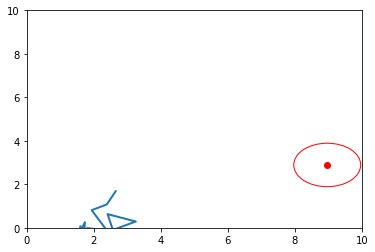

In [96]:
# test prediction
env = SimpleWalk2Dcont()
env.reset()

while True:
    action, _states = model.predict(env.state)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
env.render()


info {}
visited states:  [[1.5989342078273605, 1.500252459914, 1.7326155498330902, 1.6822860732381653, 2.0954427614515136, 1.7471680834596466, 2.4018556073015045, 1.7971754863565277, 2.494053561956198, 3.2507635548417877, 2.407646913797171, 2.6274317696397613, 2.407962401181967, 1.9334400787656616, 2.3849365010564636, 2.650710125238211], [0.06491039362545137, -0.45763935479526396, 0.25931511488552217, -0.7406848851144778, -0.7281216565073001, -1.0257132831514346, -0.8978391471803653, -0.012814778417395312, -0.13901184830074187, 0.28899205890293245, 0.629550826221658, -0.37044917377834197, -0.1653682920635211, 0.8095082309543622, 1.0766050186454785, 1.684351321726991]]
[8.96866927 2.89024106]
goal: [8.96866927 2.89024106]


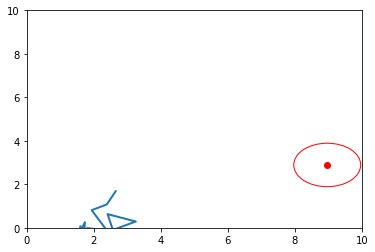

In [ ]:
# test prediction
env = SimpleWalk2Dcont()
env.reset()

while True:
    action, _states = model.predict(env.state)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
env.render()


In [97]:
evaluate_policy(model, env, n_eval_episodes=10, render=False)

C:\Users\Luttk\anaconda3\envs\rl-test\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-11.200000017881393, 0.0)

## TODO

```shell
C:\Users\Luttk\anaconda3\envs\rl-test\lib\site-packages\stable_baselines3\common\env_checker.py:130: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
```